<a href="https://colab.research.google.com/github/PedroMesquitaIsidoro/logicaFuzzy/blob/main/Pilotos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#regras:
# Regra 1: Se o individuo for pobre financeiramente e for ruim em habilidade, então será recusado na equipe
# Regra 2: Se o individuo for pobre financeiramente e for medio em habilidade, então será recusado na equipe
# Regra 3: Se o individuo for medio financeiramente e for medio em habilidade, então será recusado na equipe
# Regra 4: Se o individuo for rico financeiramente, então será aceito na equipe
# Regra 6: Se o individuo for medio financeiramente e for rico em habilidade, então será aceito na equipe

In [1]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 38.4 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=e846afb06b4f632ce0a402816d65fd0cbb824fa9fa62cfd2ce25d4eda2b9b803
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


**Antecedente e Consequente**

In [5]:
dinheiro = ctrl.Antecedent(np.arange(0, 100001, 1), 'dinheiro')
habilidade = ctrl.Antecedent(np.arange(0, 11, 1), 'habilidade')

In [7]:
dinheiro.universe

array([     0,      1,      2, ...,  99998,  99999, 100000])

In [8]:
habilidade.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [9]:
resultado = ctrl.Consequent(np.arange(0, 11, 1), 'resultado')


In [10]:
resultado.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

**Função de Pertinência**

In [12]:
dinheiro.automf(number = 3, names = ['pobre', 'medio', 'rico'])
habilidade.automf(number = 3, names = ['ruim', 'medio', 'bom'])

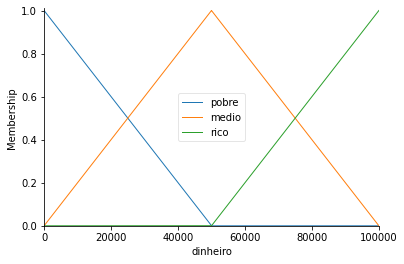

In [13]:
dinheiro.view()

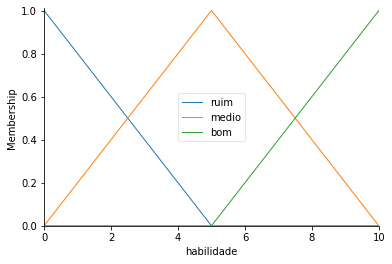

In [14]:
habilidade.view()

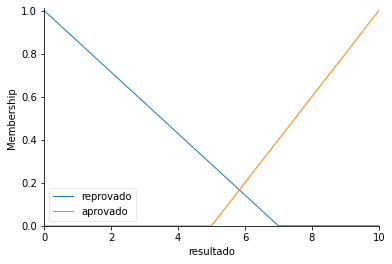

In [24]:
resultado['reprovado'] = fuzz.trimf(resultado.universe, [0, 0, 7])
resultado['aprovado'] = fuzz.trimf(resultado.universe, [5, 10, 10])
resultado.view()



**Regras**

In [34]:
#regras:
# Regra 1: Se o individuo for pobre financeiramente, então será recusado na equipe
# Regra 2: Se o individuo for medio financeiramente e for medio em habilidade, então será recusado na equipe
# Regra 3: Se o individuo for rico financeiramente, então será aceito na equipe
# Regra 4: Se o individuo for medio financeiramente e for bom em habilidade, então será aceito na equipe


In [35]:
regra1 = ctrl.Rule(dinheiro['pobre'], resultado['reprovado'])
regra2 = ctrl.Rule(dinheiro['medio'] & habilidade['medio'], resultado['reprovado'])
regra3 = ctrl.Rule(dinheiro['rico'], resultado['aprovado'])
regra4 = ctrl.Rule(dinheiro['medio'] & habilidade['bom'], resultado['aprovado'])


In [37]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4])
sistema = ctrl.ControlSystemSimulation(sistema_controle)

2.4111111111111105


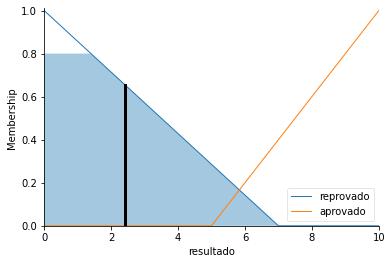

In [40]:
#lugar dos input aqui
sistema.input['dinheiro'] = 40000
sistema.input['habilidade'] = 5
sistema.compute()
print(sistema.output['resultado'])
resultado.view(sim = sistema)